## Posterior Bayes Vulnerability

 k = 3, under a nonuniform prior 1/2, 1/3, 1/6

In [1]:
import collections
import math
from sympy.utilities.iterables import partitions
import matplotlib.pyplot as plt 
%matplotlib notebook

### Variables

In [2]:
k = 3

In [3]:
n = 6

In [4]:
probs = [1/2, 1/3, 1/6]

In [5]:
range_max = 200

### Functions

__calc_set_paritions(n,p)__ calculates the number of set partitions
<br>
n: positive integer
<br>
p: a unique integer partition, as a python dictionary
<br>
Example:
```python
calc_set_partitions(6, {4:1, 1:2})
```
Output:
```python
15.0
```
Specific formula:<br>
$$|\text{set partitions}(6,\{4:1, 1:2\}) |= \frac{6!}{\left(4!\right)1! \times \left(1!1!\right)2!} $$

Generalized formula:<br>
With an interger parition $p$ containing integers $i$, each with multiplicity of $m$,
$$|\text{set partitions}(n,p)|=\frac{n!}{\prod_{i \in p} i!^m m!}$$

In [6]:
def calc_set_partitions(n,p):
    num = math.factorial(n)
    den = 1
    val = 0
    for key in p.keys():
        val = p[key]
        for i in range(val):
            den = den * math.factorial(key)
        den = den * math.factorial(val)
    frac = num / den
    return frac

__calc_max_prob__ calculates the maximum probability of a unique integer partition <br>
Multiplies the largest fraction in $\pi$ to the power of the largest integer in the integer partition in decending order<br>
p: a unique integer partition, as a python dictionary<br>
Pi: the prior probability distribution<br>
Example:
```python
calc_max_prob({4:1,1:2},[1/2, 1/3, 1/6])
```
Output:
```python
0.003472222222222222
``` 
which is equal to 1/288

In [7]:
def calc_max_prob(p, Pi):
    Pi.sort(reverse=True)
    frac = 1
    ind = 0
    val = -1
    for key in sorted(p.keys(), reverse=True):
        val = p[key]
        for i in range(val):
            frac = frac * pow(Pi[ind], key)
            ind = ind + 1
    return frac

$$ V_1 [C \triangleright \pi ]  = \sum_{p=1}^{|\text{partitions}(n, k)|} \text{set partitions}(n, p)\times\text{max prob} (p, \pi )  $$

__partitions(n, m)__ generates a dictionary of integer partitions
<br>
n: positive integer
<br>
m: the maximum number of parts in partition
<br>
Outputs a dictionary where the keys are the integers and the values are the number of times that integer occurs

Example:
```python
for p in partitions(6,3):
    print(p)
```
Output:
```python
{6:1}
{5:1, 1:1}
{4:1, 2:1}
{4:1, 1:2}
{3:2}
{3:1, 2:1, 1:1}
{2:3}
```
For every dictionary, __nonuni_post_bayes_vuln__ multiplies the number of set partitions and its max probability.
These numbers are added together for all integer partitions to calculate the final posterior bayes vulnerability.

In [8]:
def nonuni_post_bayes_vuln(n, k, Pi):
    pbvsum = 0
    for p in partitions(n, m=k):  
        num = calc_set_partitions(n,p)
        frac = calc_max_prob(p, Pi)
        val = num * frac
        pbvsum = pbvsum + val
    return pbvsum

### Test Calculation

In [9]:
nonuni_post_bayes_vuln(n, k, probs)

0.43113425925925924

In [10]:
745/1728

0.43113425925925924

### Graph for n = 1 - range_max

In [11]:
nupbvs = []
for i in range(range_max):
    nupbv = nonuni_post_bayes_vuln(i+1, k, probs)
    nupbvs.append(nupbv)
print(nupbvs)

[0.5, 0.41666666666666663, 0.4027777777777778, 0.3958333333333333, 0.4131944444444444, 0.43113425925925924, 0.45071373456790115, 0.47124164094650195, 0.49189546896433456, 0.5100027327674895, 0.5286089945558984, 0.5460162099551324, 0.5620028439536178, 0.5777079682945385, 0.5926510927572133, 0.6064540469803313, 0.6199858515476071, 0.6328641759507894, 0.6449275762052176, 0.6566809853732916, 0.6679182597648781, 0.6785217391782529, 0.6888306889914446, 0.6987095450758978, 0.708088772920213, 0.7171911765432654, 0.7259328612922994, 0.7342690325659702, 0.7423516001752649, 0.750126842643426, 0.7575671873933534, 0.7647772270497627, 0.7717230716833271, 0.778387857720002, 0.7848448735801133, 0.7910728732069704, 0.7970620098085374, 0.802864302920058, 0.8084667620927148, 0.8138640456690108, 0.8190935860760112, 0.8241477614597112, 0.8290241292085966, 0.8337499783661965, 0.8383211829261487, 0.8427371368666922, 0.847018000709073, 0.8511619078918214, 0.8551693921509967, 0.8590555494129081, 0.862819955590

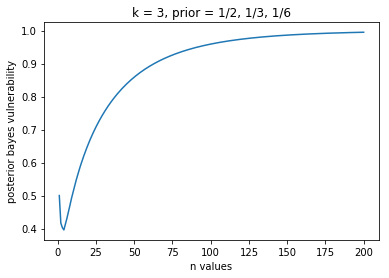

In [12]:
# plotting the points  
x = [i+1 for i in range(range_max)]

plt.plot(x, nupbvs)

plt.xlabel('n values')
plt.ylabel('posterior bayes vulnerability')

plt.title('k = 3, prior = 1/2, 1/3, 1/6')

plt.show()